# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
import csv
import random
import numpy as np
import tqdm

In [2]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

Create a cost function (MSE)
use gradient descent to minimize cost function
have alpha (learning rate), beta (threshold)

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [3]:
# implement Linear Regression

In [4]:
# adding bias term theta_0
def add_bias_term(X):
    X_0 = []
    for x in X:
        x.insert(0,1)
        X_0.append(x)
    X = X_0
    return X

In [5]:
x_train = add_bias_term(x_train)
x_test = add_bias_term(x_test)

In [6]:
def hypothesis(theta, x):
    return np.dot(x,theta).flatten()

In [7]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    return sum(((y1-y)**2))/(2*len(x_train))

In [8]:
def gradientDescent(X, y, alpha, i):
    J = []
    m = len(X)
    y = np.array(y)
    X = np.array(X)
    theta = np.zeros(5)
    theta = theta.astype("float64")
    for k in (range(i)):
        print(k)
        y1 = np.array(hypothesis(theta, X))
        theta = theta - (alpha/m)*(np.dot(X.transpose(),(y1 - y)))
        j = computeCost(X,y,theta)
        J.append(j)
    return J, j, theta

In [9]:
J, j, theta = gradientDescent(x_train, y_train, 0.05, 10000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [11]:
y_pred = hypothesis(theta,x_test)

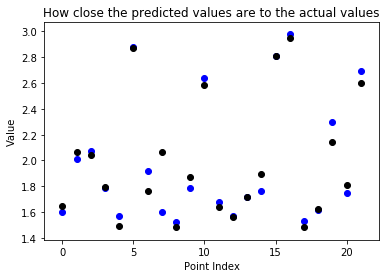

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0, 22)),y= y_test, color='blue')         
plt.scatter(x=list(range(0, 22)), y=y_pred, color='black')
plt.title("How close the predicted values are to the actual values")
plt.xlabel("Point Index")
plt.ylabel("Value")
plt.legend
plt.show()

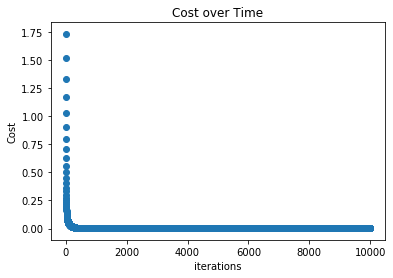

In [13]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.title("Cost over Time")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

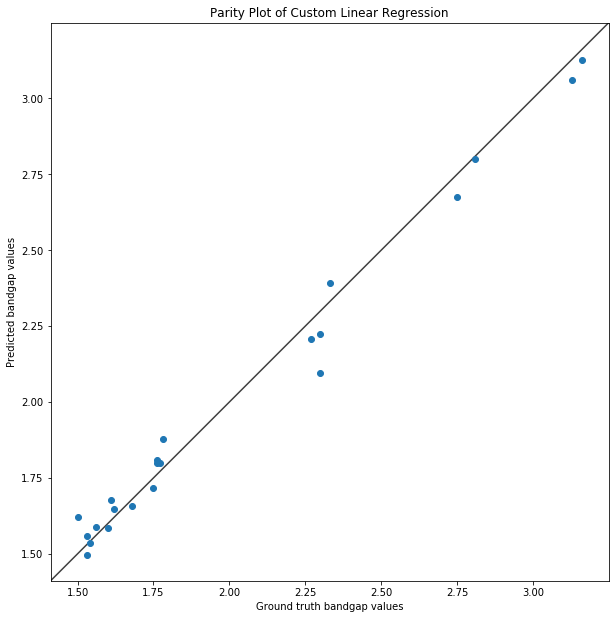

In [16]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

Ridge Regrssion penalizes the magnitude of coefficients fo features along with minimizing the error between predicted and actual observations. Ridge Regression performs L2 regularization and its minimization objective when updating the values of each theta, multiplies the sum of square of coefficients.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [15]:
alphas = np.arange(0,1.01,0.01)

     alpha  rmse values
0     0.00     0.120679
1     0.01     0.120585
2     0.02     0.120499
3     0.03     0.120422
4     0.04     0.120352
5     0.05     0.120291
6     0.06     0.120237
7     0.07     0.120191
8     0.08     0.120153
9     0.09     0.120122
10    0.10     0.120099
11    0.11     0.120083
12    0.12     0.120074
13    0.13     0.120072
14    0.14     0.120077
15    0.15     0.120089
16    0.16     0.120108
17    0.17     0.120134
18    0.18     0.120166
19    0.19     0.120204
20    0.20     0.120249
21    0.21     0.120301
22    0.22     0.120358
23    0.23     0.120421
24    0.24     0.120491
25    0.25     0.120566
26    0.26     0.120647
27    0.27     0.120733
28    0.28     0.120825
29    0.29     0.120923
30    0.30     0.121026
31    0.31     0.121134
32    0.32     0.121248
33    0.33     0.121366
34    0.34     0.121490
35    0.35     0.121618
36    0.36     0.121751
37    0.37     0.121889
38    0.38     0.122031
39    0.39     0.122178
40    0.40     0

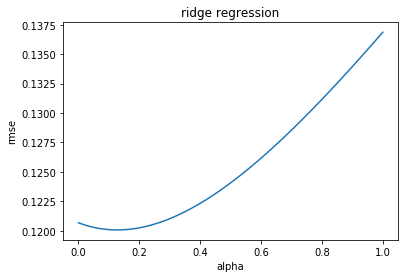

In [18]:
import pandas as pd
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rmse_values = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train , y_train)
    y_pred = ridge_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test ,  y_pred))
    rmse_values.append(rmse)

df = pd.DataFrame({'alpha': alphas , 'rmse values': rmse_values})
print(df.to_string())

plt.plot(alphas , rmse_values)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("ridge regression")
plt.show()


Loss decreases as alpha increases, reaches a lowest point and then increases again. This is because the model overfits and the point where the rmse value is the lowers and then with regularization of the coefficients it corrects this overfitting in order to get better results on unseen data. After a point the loss increases above the level where there was no regularization which means now the model underfit.

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso Regression also penalizes the magnitude of coefficients fo features along with minimizing the error between predicted and actual observations. Lasso Regression performs L1 regularization and its minimization objective when updating the values of each theta, multiplies the sum of absolute value of coefficients.


2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

     alpha  rmse values
0     0.00     0.120679
1     0.01     0.129951
2     0.02     0.162779
3     0.03     0.206860
4     0.04     0.256455
5     0.05     0.304387
6     0.06     0.338030
7     0.07     0.373834
8     0.08     0.411235
9     0.09     0.449835
10    0.10     0.481676
11    0.11     0.481676
12    0.12     0.481676
13    0.13     0.481676
14    0.14     0.481676
15    0.15     0.481676
16    0.16     0.481676
17    0.17     0.481676
18    0.18     0.481676
19    0.19     0.481676
20    0.20     0.481676
21    0.21     0.481676
22    0.22     0.481676
23    0.23     0.481676
24    0.24     0.481676
25    0.25     0.481676
26    0.26     0.481676
27    0.27     0.481676
28    0.28     0.481676
29    0.29     0.481676
30    0.30     0.481676
31    0.31     0.481676
32    0.32     0.481676
33    0.33     0.481676
34    0.34     0.481676
35    0.35     0.481676
36    0.36     0.481676
37    0.37     0.481676
38    0.38     0.481676
39    0.39     0.481676
40    0.40     0

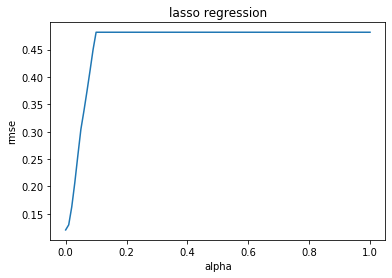

In [19]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`

# you should not have imported sklearn before this point
from sklearn.linear_model import Lasso

rmse_values = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train , y_train)
    y_pred = lasso_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test ,  y_pred))
    rmse_values.append(rmse)

df = pd.DataFrame({'alpha': alphas , 'rmse values': rmse_values})
print(df.to_string())

plt.plot(alphas , rmse_values)
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.title("lasso regression")
plt.show()


The loss does not decrease that much as alpha increases and then suddenly goes through a rapid incerase. This is different from ridge because lasso uses l1 norm and so penalizes the coefficients during regularization more harshly, and the model ends up underfitting quicker.